In [273]:
#P.Divya
#email:divyapitla70@gmail.com

In [274]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from textblob import TextBlob
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [275]:
def get_title(soup):
    try:
        title = soup.find("span", attrs={"id": "productTitle"})
        title_value = title.text.strip()
    except AttributeError:
        title_value = ""
    return title_value

In [276]:

def get_price_details(soup):
    try:
        original_price = soup.find("span", attrs={'class':'a-price a-text-price a-size-base'}).find("span",attrs={'class':"a-offscreen"}).string.strip()
        deal_price = soup.find("span", attrs={'class':'a-price a-text-price a-size-medium apexPriceToPay'}).find("span",attrs={'class':"a-offscreen"}).string.strip()
    except AttributeError:
        original_price, deal_price = "", ""
    return original_price, deal_price

In [277]:
def get_rating(soup):
    try:
        
        rating_element = soup.find("i", class_=lambda x: x and "a-icon-star-medium" in x)
      
        if rating_element:
            
            for cls in rating_element.get("class", []):
                if cls.startswith("a-star-medium-"):
                   
                    return float(cls.split("-")[-1].replace("-", "."))
    except AttributeError:
        return None  


In [278]:
# Function to extract Number of User Reviews

def get_review_count(soup):
    try:
        review_count = soup.find("span", attrs={'id': "acrCustomerReviewText"}).string.strip()
    except AttributeError:
        review_count = ""
    return review_count

In [279]:
# Function to extract Preferred Style
def extract_style(title):
    styles = ["modern", "bohemian", "minimalist", "rustic"]
    for style in styles:
        if style in title.lower():
            return style
    return "Other"

In [280]:
# Function to classify Budget Range
def classify_budget(price):
    try:
        price = float(price[1:].replace(',', ''))
        if price < 500:
            return "Low"
        elif price < 2000:
            return "Mid"
        else:
            return "High"
    except:
        return "Unknown"

In [281]:
# Function to analyze Sentiment
def analyze_sentiment(review):
    if not review:
        return "Neutral"
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

In [282]:
if __name__ == '__main__':
     #user agent
    HEADERS = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/132.0.0.0 Safari/537.36',
                'Accept-Language':'en-US, en;q=0.5'})

    
    URL = "https://www.amazon.com/s?k=home+decor" 
     
    d = {"title": [], "original_price": [], "deal_price": [], "rating": [], "reviews": [], "style": [], "budget": [], "sentiment": []}

    # HTTP Request
    webpage = requests.get(URL, headers=HEADERS)
    
    soup = BeautifulSoup(webpage.content, "html.parser")

    # Fetch links as List of Tag Objects
    links = soup.findAll("a", attrs={'class': 'a-link-normal s-no-outline'})

    # Store the links
    links_list = []
    links_list = list(set(links_list))  # Removes duplicates

    for link in links:
        href = link.get('href')  
        if href: 
            links_list.append("https://www.amazon.com/"  + href)

    for link in links_list:
        new_webpage = requests.get(link, headers=HEADERS)
        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to get data
        title = get_title(new_soup)
        original_price, deal_price = get_price_details(new_soup)
        rating = get_rating(new_soup)
        reviews = get_review_count(new_soup)

        d['title'].append(title)
        d['original_price'].append(original_price)
        d['deal_price'].append(deal_price)
        d['rating'].append(rating)
        d['reviews'].append(reviews)
        d['style'].append(extract_style(title))
        d['budget'].append(classify_budget(deal_price))
        d['sentiment'].append(analyze_sentiment(reviews))

    # Create DataFrame
    amazon_df = pd.DataFrame.from_dict(d)

    # Clean and save the data
    amazon_df['title'].replace('', np.nan, inplace=True)
    amazon_df = amazon_df.dropna(subset=['title'])
    amazon_df = amazon_df.drop_duplicates(subset=['title'])
    amazon_df.to_csv("amazon_home_decor.csv", header=True, index=False)
    print("Data saved to amazon_home_decor.csv")


Data saved to amazon_home_decor.csv


C:\Users\Divya Pitla\AppData\Local\Temp\ipykernel_29496\1933750197.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amazon_df['title'].replace('', np.nan, inplace=True)


In [283]:
 webpage 

<Response [200]>

In [284]:
import pandas as pd

In [285]:
df=pd.read_csv('amazon_home_decor.csv')

In [286]:
df.head(10)

,title,original_price,deal_price,rating,reviews,style,budget,sentiment
0,Zenna Home Designer Series Medicine Cabinet wi...,NaN,NaN,4.0,"1,151 ratings",Other,Unknown,Neutral
1,"Candle Warmer Lamp with Timer, Adjustable Heig...",$35.59,$29.99,5.0,"1,114 ratings",Other,Low,Neutral
2,"OLANLY Bathroom Rugs 30x20, Extra Soft Absorbe...",NaN,NaN,5.0,"6,491 ratings",Other,Unknown,Neutral
3,Candle Warmer Lamp with Timer Dimmer Adjustabl...,$39.99,$33.99,5.0,674 ratings,Other,Low,Neutral
4,"Candle Warmer Lamp with Timer and Dimmer,Elect...",$35.99,$33.99,5.0,233 ratings,Other,Low,Neutral
5,Kitcom Handmade Crystal Bookends Half-Obelisk ...,NaN,NaN,5.0,21 ratings,Other,Unknown,Neutral
6,"Under Cabinet Lighting Wireless, 1600mAh Recha...",$49.99,$23.99,5.0,38 ratings,Other,Low,Neutral
7,"Under Cabinet Lights, 3 Color Temperatures Mot...",$35.99,$18.00,4.0,100 ratings,Other,Low,Neutral
8,Warm Color LED Closet Lights Wireless Motion S...,NaN,NaN,5.0,"11,041 ratings",Other,Unknown,Neutral
9,Shower Caddy Adhesive Shower Organizer Bathroo...,NaN,NaN,5.0,"2,097 ratings",Other,Unknown,Neutral


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           65 non-null     object 
 1   original_price  16 non-null     object 
 2   deal_price      16 non-null     object 
 3   rating          65 non-null     float64
 4   reviews         65 non-null     object 
 5   style           65 non-null     object 
 6   budget          65 non-null     object 
 7   sentiment       65 non-null     object 
dtypes: float64(1), object(7)
memory usage: 4.2+ KB


In [288]:
df.shape

(65, 8)

In [289]:
df.describe()

,rating
count,65.000000
mean,4.892308
std,0.312404
min,4.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [290]:
df['original_price'] = df['original_price'].str.replace('[^0-9.]', '', regex=True).astype(float)
df['deal_price'] = df['deal_price'].str.replace('[^0-9.]', '', regex=True).astype(float)


In [291]:
df['original_price'] = df['original_price'].fillna(df['original_price'].mean())


In [292]:
df['reviews'] = df['reviews'].astype(str).str.extract(r'(\d+)').astype(int)

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           65 non-null     object 
 1   original_price  65 non-null     float64
 2   deal_price      16 non-null     float64
 3   rating          65 non-null     float64
 4   reviews         65 non-null     int32  
 5   style           65 non-null     object 
 6   budget          65 non-null     object 
 7   sentiment       65 non-null     object 
dtypes: float64(3), int32(1), object(4)
memory usage: 3.9+ KB


<Axes: xlabel='rating', ylabel='Count'>

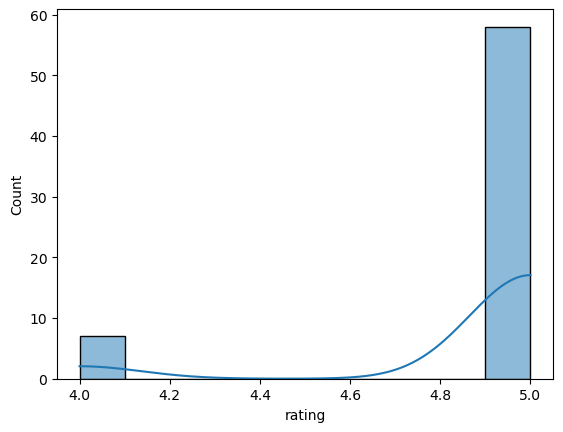

In [294]:
sns.histplot(df['rating'], bins=10, kde=True)


<Axes: xlabel='original_price', ylabel='deal_price'>

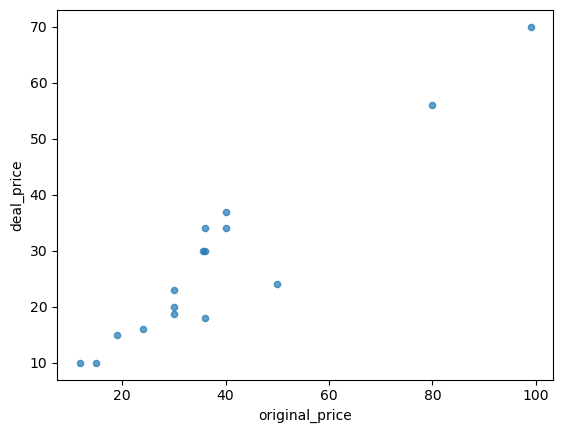

In [295]:
df.plot(kind='scatter', x='original_price', y='deal_price', alpha=0.7)


<Axes: xlabel='sentiment'>

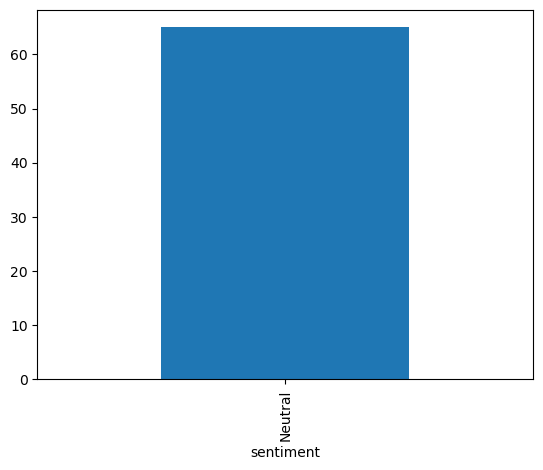

In [296]:
df['sentiment'].value_counts().plot(kind='bar')


Text(0.5, 1.0, 'style')

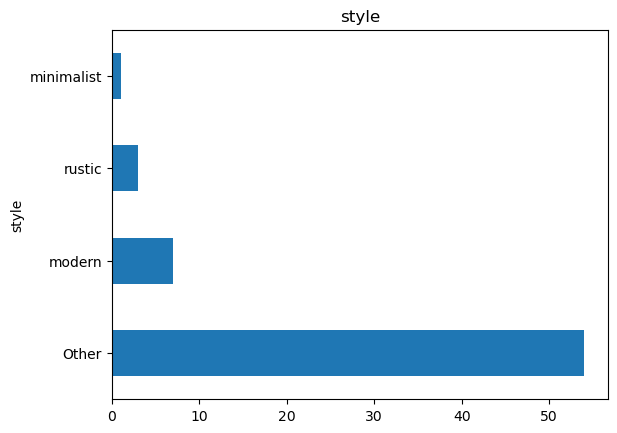

In [297]:
df['style'].value_counts().plot(kind='barh')
plt.title("style")


Text(0.5, 1.0, 'Budget')

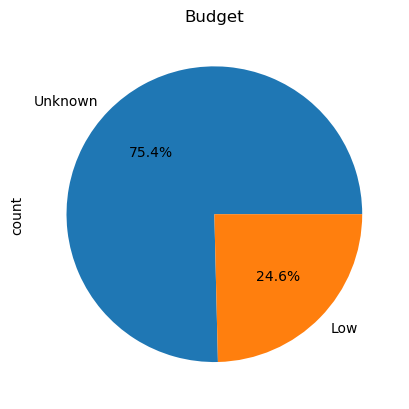

In [298]:
df['budget'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Budget")


In [299]:

# Correlation between price and rating
correlation = df[['original_price', 'rating']].corr()
print("Correlation between price and rating:\n", correlation)

# Sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
print("Sentiment distribution:\n", sentiment_counts)

# Popular styles
popular_styles = df['style'].value_counts().head(5)
print("Top 5 styles:\n", popular_styles)


Correlation between price and rating:
                 original_price    rating
original_price        1.000000  0.010431
rating                0.010431  1.000000
Sentiment distribution:
 sentiment
Neutral    65
Name: count, dtype: int64
Top 5 styles:
 style
Other         54
modern         7
rustic         3
minimalist     1
Name: count, dtype: int64


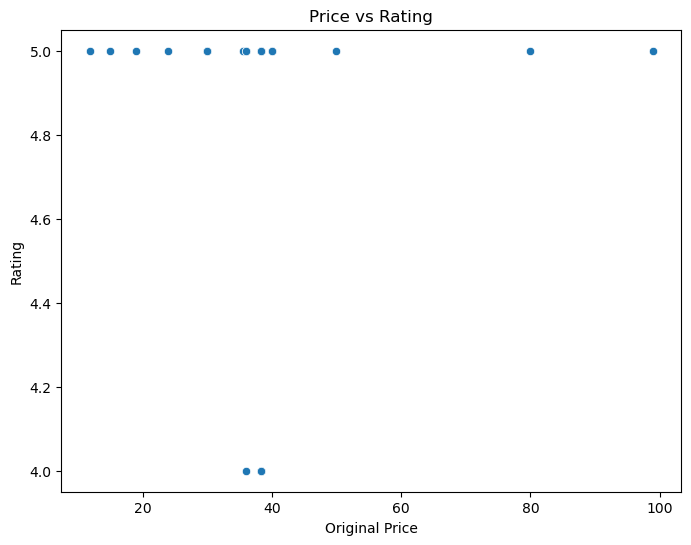

In [300]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='original_price', y='rating', data=df)
plt.title("Price vs Rating")
plt.xlabel("Original Price")
plt.ylabel("Rating")
plt.show()




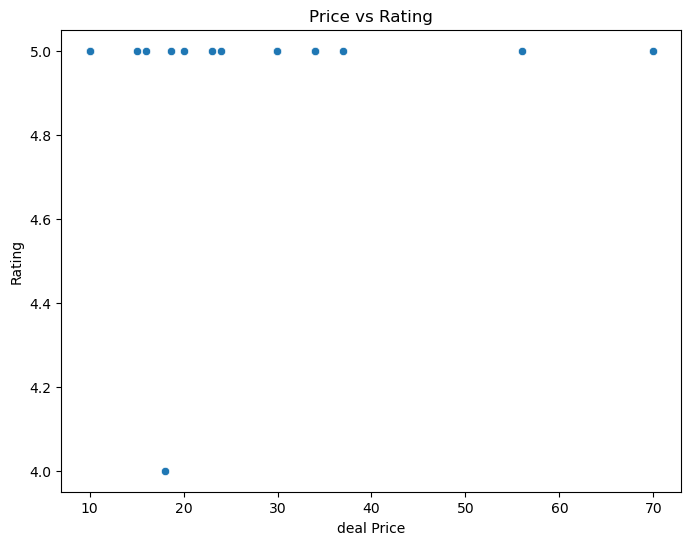

In [301]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='deal_price', y='rating', data=df)
plt.title("Price vs Rating")
plt.xlabel("deal Price")
plt.ylabel("Rating")
plt.show()

In [302]:
#recommendation 
#Enhance Customer Experience
# Focus on Sustainability
#Optimize Pricing and Discounts
#Conduct Surveys on Style Preferences
#Incorporate Customer Feedback
#Focus on Affordable Options
#Highlight Bestsellers and Trends
#Strengthen Delivery and Returns